# **1.6 Perceptron Learning** #

## ***Vocabulary & Code*** ##

**Euclidean Norm**
The L2 norm, or Euclidean norm, measures the length of a vector. It's calculated as

$$||w^*||_2 = \sqrt{\sum_i(w_i^*)^2} $$

Importance:
- Size: Measures the vector’s magnitude.
- Optimization: Helps in regularization to avoid large weights.
- Distance: Used for calculating distances between points or vectors.

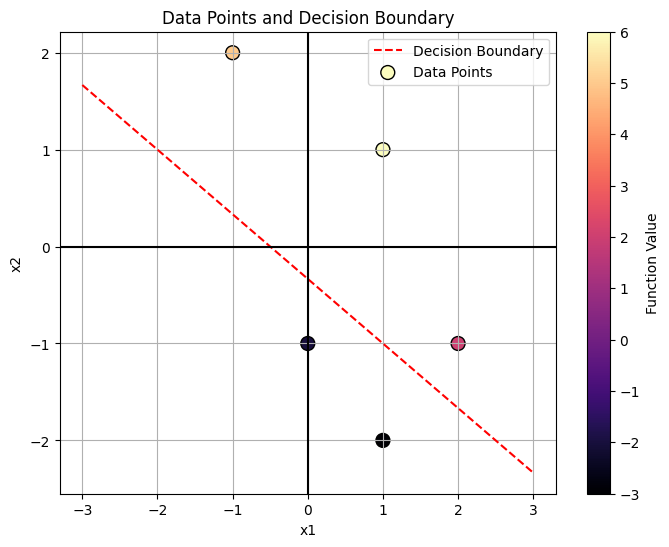

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the linear function
def linear_function(x1, x2):
    return 2 * x1 + 3 * x2 + 1

# Define the weight vector and bias
w = np.array([2, 3])
b = 1

# Define the decision boundary line
def decision_boundary(x1):
    return - (w[0] * x1 + b) / w[1]

# Create data points
points = np.array([
    [1, 1],
    [2, -1],
    [-1, 2],
    [1, -2],
    [0, -1]
])

# Compute function values
values = np.array([linear_function(x1, x2) for x1, x2 in points])

# Extract x1 and x2 for plotting
x1 = points[:, 0]
x2 = points[:, 1]

# Create the plot
plt.figure(figsize=(8, 6))

# Plot the decision boundary
x1_vals = np.linspace(-3, 3, 400)
x2_vals = decision_boundary(x1_vals)
plt.plot(x1_vals, x2_vals, 'r--', label='Decision Boundary')

# Set darker gridlines for x=0 and y=0
plt.axhline(0, color='k', linewidth=1.5)
plt.axvline(0, color='k', linewidth=1.5)

# Plot the data points
plt.scatter(x1, x2, c=values, cmap='magma', s=100, edgecolor='k', label='Data Points')
plt.colorbar(label='Function Value')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data Points and Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()

## ***1.6.0 Introduction*** ##

The perceptron is a learning algorithm for half-spaces that has provable guarantees.

The function class we will be learning is

$$ C = \{Halfspaces\} $$
$$ f(x) = sign(\sum_{i=1}^{n} w_ix_i- \theta) $$

where theta is some scalar threshold, and the vector $w$ is unknown.

We will assume that $f(x) \in \{-1, 1\}, x_i \in  \mathbf{R}$.

So $f(x)$ is really just evaluating a liner function on some unknown weight vector $w$, and then taking its sign.

A complicated algorithm (but efficient polynomial time algorithm) for learning halfspaces:

$$(x^1, +1) \leadsto w_1x_1^1+...+w_nx_n^1 \ge \theta$$
$$(x^2, -1) \leadsto w_1x_1^2+...+w_nx_n^2 \le \theta$$

if m points in our training set, we will have $m$ inequalitites, and we can use LP (linear programming) solvers to find a weight vector $w$ consistent with our training set.

The LP solvers are nontrivial and take a long time to run, so we will make an assumption and move to the perceptron algorithm.

---

Moving back to the mistake bounded model...

The algorithm:
Initially we will have a guess for our weight vector, which could just be 0's, $w^0 = (0, ..., 0)$, or the unit vector, it really does not matter.

The learner has w as its state, and the teacher will present a challenge, $ x \in \mathbf{R}^n $. The learner will respond with $sign(w \cdot x)$. Of course if no mistake is made, the learner will not update its state. If a mistake is made, there will be 2 cases:

**The Update Rule/Step**
1. $x$ was truly a negative example $\to w_{new} = w_{old} - x $
2. $x$ was truly a positive example $\to w_{new} = w_{old} + x $

or another way to view (equivalent):

Every time we make a mistake, $ w_{new} = w_{old} + y*x $, where $y$ is the label. The y will make $x$ positive or negative as needed.

**Update Rule:**

$$w_{new} = w_{old} + y*x$$

## ***1.6.1 Expanding on the Update Rule*** ##

We will need some assumptions to prove this algorithm actually works.

**Assumptions**:

1. $\exists w^*$, true unknown weight vector $||w^*||_2 = 1$
2. every $x$ that we see has norm 1, $||x||_2 = 1$
3. $\theta = 0$, the threshold equals 0

The first assumption is without loss of generality, if we increase the magnitude of w it will not affect the sign. The second is not without loss of generality, it will be shown how to handle input points thave have larger norm. The third assumption is easy to circumvent too, but is being done for simplicity.

The main assumption is **The Margin Assumption**: 
- There exists a margin $\rho$, that all points are at least distance $\rho$ from $w^*$.

<br>
<center>
    <img src="images/1.6.1.png" alt="Professor Notes" />
</center>
<br>

Note: The notation $||w^*||_2$​ represents the L2 norm (or Euclidean norm) of the vector w∗. It measures the "length" or "magnitude" of the vector in a Euclidean space.

All challenges for challenges will obey these assumptions.

---

**"Perceptron Convergence Theorem"**

The mistake bound of the perceptron algorithm is $\mathcal{O}(\frac{1}{\rho^2})$, order 1 over rho squared. 

This means that if all of the examples obey this margen assumption, then the learner using the perceptron algorithm will make at most $\mathcal{O}(\frac{1}{\rho^2})$ mistakes. This is the mistake bound.

**Proof**

Recall the update step is $ w_{new} = w_{old} + y*x $.

Let's say $w$ is the current state of the learner, and recall that $w^*$ is the true normal to the halfspace. 

We have 2 claims:

1. On every mistake, $w \cdot w^*$ increases by at least $\rho$
2. $||w||^2$ increases after every mistake by at most 1

---

Question: How to obtain the $\mathcal{O}(\frac{1}{\rho^2})$ mistake bound, given claims 1 and 2? Let $t$ be the number of mistakes we've made at a given point during execution.

After $t$ mistakes, 

$$t*\rho \le w\cdot w^* \le ||w||\cdot ||w^*||$$

and since $||x||_2 = 1$ (assumption 2), and the square of $||w||$ is at most t (idk why), therefore:

$$ t*\rho \le \sqrt{t}$$

Which simplifies to:

$$ t \le \frac{1}{\rho^2} $$





Note: The upper bound $||w||\cdot ||w^*||$ comes from the Cauchy-Schwarz inequality, which states that for any vectors $w$ and $w∗$, the absolute value of their dot product is at most the product of their magnitudes.

## ***1.6.2 Proving Claim 1 & 2*** ##

**Claim 1**: On every mistake, $w \cdot w^*$ increases by at least $\rho$

**Proof**:

$$w_{new} = w_{old} + y * x $$ <center>^^ (update rule)</center>

$$w_{new} \cdot w^* = (w_{old} + y * x) cdot w^*$$

$$w_{old} \cdot w^* + y*x \cdot w^*$$

and we know $y*x \cdot w^* \ge \rho$ (recall the margin assumption), which means that the inner product has increased by at least $\rho$ 

End proof 1.

**Claim 2**: $||w||^2$ increases after every mistake by at most 1

**Proof**:

$$w_{new} = w_{old} + y * x $$ <center>^^ (update rule)</center>

$$w_{new} = ||w_{old} + y * x|| $$

$$w_{new} = ||w_{old}||^2 + 2y \langle x , w_{old}\rangle + ||x||^2$$

and recall from assumption 2 that $||x||_2 = 1$, and we know that $2y \langle x , w_{old}\rangle$ is negative because we made a mistake so the sign of $y$ must be different from $x$ inner product $w_{old}$, so

$$w_{new} = ||w_{old}||^2 + 2y \langle x , w_{old}\rangle + 1$$

Which means that the $w_{new}$ is increasing by at most 1 on every mistake. (Still a little foggy).

End proof 2.

---

Question: Is $w$ monotonically improving? Not necessarily. But in the aggregate you will make at most $\frac{1}{\rho}$ mistakes.

---

Revisiting the assumptions:

- How can we circumvent $\theta = 0$? Add a new feature, $x_n +1$, creating the homogenous or augmented linear function. (see chapter 9 in book)

- How can we circumvent $||x|| = 1$? If $||x|| = \mathbf{R}$ then you can reanalyze the perceptron algorithm and your mistake bound will be $\mathcal{O}(\frac{\mathbf{R}^2}{\rho^2})$. Just a direct reanalysis of the algorithm, meaning you will pay if your points have larger norm, but only quadratically.

## ***1.6.3 Polynomial Threshold Functions*** ##

Consider polynomial threshold functions (PTFs). They are of the form:

$$f = sign(p(x)) $$

Where p is a multivariate polynomial of, lets say, degree $d$.

How can we use the perceptron algorithm as a black box to learn this function class?

---

Imagine that our data was not linear. We would have a feature map that takes in $(x_1, ... x_n)$, we could map 

$$x_1, ..., x_n \mapsto x_1^2, x_1x_2, ..., x_n^2 $$

We will have $n^2$ new variables, $Y_z, ..., Y_{N=n^2}$, and then $f$ can be written as

$$ f=sign(\sum_{i=1}^{N}w_iY_i)$$

Since f is the sign of some $w_i Y_i$, it is actually a half space, but its in $n^2$ dimensions. 

So you can view a polynomial of degree 2 in $n$ dimensions as a half space in $n^2$ dimensions. Then we can run the perceptron algorithm to learn this halfspace in higher dimensions.

That is to say that **learning PTFs of degree $d$ is equivalent to learning halfspaces in $n^d$ dimensions**. 

---

Let us consider two quantities:
- Run-time: linear perceptron was linear time. In $n^d$ dimensions. Just computing the feature map for the PTF will takes time $n^d$.
- What is the margin in this $n^d$ dimensional space, what is $\rho$? This may be costly. Recall this was used to calculate run time where the perceptron algorithm always runs in time of $\frac{1}{\rho^2}$.

## ***1.6.4 Kernel Functions*** ##

Continuing the quantities being considered at the end of 1.6.3...

We can save on the running time dramatically using something called the **kernel trick**. We can get the run-time back to linear time in some sense. We still cannot say much about the margin, but still will have a big improvement in run time.

**The Kernel Perceptron**

x is our input. $\phi(x)$ is the image of $x$ in the feature space.

So if $x \in \mathbf{R}^n$, and we are looking at polynomials of degree $d$, what is the dimension of $\phi(x)$? $\phi(x) \in \mathbf{R}^{n^{\mathrm{d}}}$

Imagine we had a function $K$ as such:

$$K(x^1, x^2)$$

that outputs

$$\langle \phi(x^1), \phi(x^2) \rangle $$

and assume $K(x^1, x^2)$ is easy to compute.]

K is a kernel function, and what its going to do is take any pair of points, and its going to ouput the inner product of the phi of the points, and it is easy to compute.

---

**Kernel Perceptron**

$w = 0^{n^d}$, our initial weights vector initialized to zero, of length $n^d$. Let's assume we make a mistake, our update rule will be:

$$w_{new} = w_{old} + y*\phi(x)$$

Say we make a mistake on $x^1$, we need to evaluate $w_{new} \cdot \phi(x^2)$, $x^2$ being our new point. 

We need to evaluate $w_{new} \cdot \phi(x)$, this is how we decide whether to send back +1 or -1, we compute this and take the sign. In order to compute this value, we need to work in this $n^d$ dimensional space. 

The kernel trick: Recall that since $w_{new} = \langle y*\phi(x^1), \phi(x^2) \rangle$, then the right side of that equation is what we need to compute.

Since we said that $K(x^1, x^2) = \langle \phi(x^1), \phi(x^2) \rangle $, then:

$$ w_{new} =  \langle y*\phi(x^1), \phi(x^2) \rangle = y*K(x^1, x^2)$$


and recall we said that the kernel function would be easy to evaluate, and that the input vectors to the kernel function are of length $n$, not $n^d$.

---

So, 

$$w_{t+1} = \sum_{i=1}^t y^i*\phi(x^i) \in \mathbf{R}^{n^d}$$

If we need to compute $\langle w_{t+1}, \phi(x^{t+1})\rangle$, we're going to get $\sum_{i=1}^t y^i*\langle \phi(x^1), \phi(x^2) \rangle$ where $\langle \phi(x^i), \phi(x^{t+1}) \rangle$ is$K(x^i, x^{t+1})$, which is efficiently computable.

## ***1.6.5 Example Kernel Functions*** ##

<br>
<center>
    <img src="images/1.6.2.png" alt="Professor Notes" />
</center>
<br>

<br>
<center>
    <img src="images/1.6.3.png" alt="Professor Notes" />
</center>
<br>

## **Reading**
**[Understanding Machine Learning: From Theory to Algorithms, Chapter 9](https://www.cs.huji.ac.il/~shais/UnderstandingMachineLearning/index.html)** 